In [23]:
# Import the necessarry libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency, shapiro
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# A Comparative Study of Machine Learning Models for Heart Failure Survival Prediction

## Business Understanding
Heart failure is a critical issue in healthcare, with a pressing need for accurate prognostic models to predict patient survival. Predicting patient outcomes helps medical professionals make well-informed decisions about treatment plans, which enhances patient care and maximizes the use of resources in hospitals.

### Objective:
The primary objective of this project is to leverage machine learning techniques to predict patient survival based on clinical features. By exploring important clinical features, the aim is to enhance the accuracy of survival predictions and gain deeper insights into heart failure prognosis.

### Dataset Source
The Dataset is retrieved from https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

### Data Understanding
There are 299 patient records in the dataset, with 12 clinical features. The aim is to forecast the survival rate of patients by utilizing the binary target variable “DEATH_EVENT.” The dataset is multivariate, encompasses various data types, and is free of missing values, having been derived from clinical records related to heart failure.

Here is the description of the features of the dataset.

* age: Representing patient age in years.
* anaemia: Binary (0 or 1) for presence or absence of decreased red blood cells.
* creatinine_phosphokinase: CPK enzyme level in the blood mcg/L.
* diabetes: Binary (0 or 1) for presence or absence of diabetes.
* ejection_fraction: Percentage of blood leaving the heart.
* high_blood_pressure: Binary (0 or 1) for presence or absence of hypertension.
* platelets: Numeric variable for platelet count in the blood (kiloplatelets/mL).
* serum_creatinine: Numeric variable for serum creatinine level in the blood (mg/dL).
* serum_sodium: Numeric variable for serum sodium level in the blood (mEq/L).
* sex: Binary (0 for women, 1 for men) indicating patient gender.
* smoking: Presence(1) or absence(0) of smoking.
* time: Representing follow-up period in days.
* death_event: Binary (0 or 1) indicating patient survival status

## Exploration of the dataset

In [24]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

# Load the dataset into a DataFrame
data = pd.read_csv(url)

# Check the first few rows of the data and inspect 
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Display summary statistics of the dataset
summary = data.describe()
summary

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# Check for any missing values in the data set
missing_values = data.isna().sum()
missing_values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# Check the data types
data_types = data.dtypes
data_types

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### Check the Distributions of the Categorical features

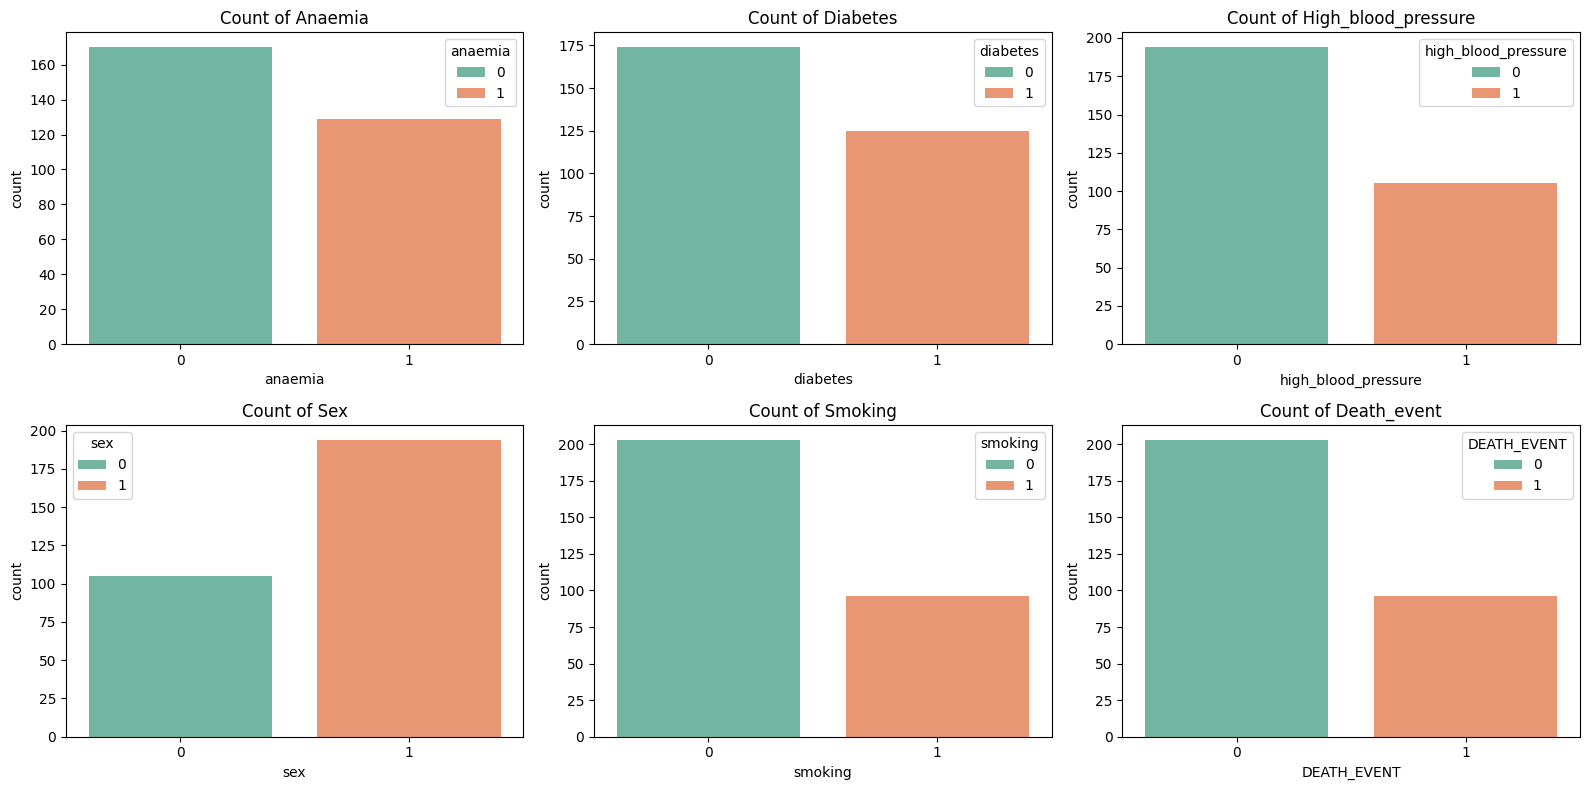

In [27]:
# Check the distribution of key features

# Define the categorical features 
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

# Count plot for each categorical variable
plt.figure(figsize=(16, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    # Create a count plot for the current feature and with bars colored by the feature's values
    sns.countplot(x=feature, hue=feature, data=data, palette="Set2")
    plt.title(f'Count of {feature.capitalize()}')

#Adjust the layout
plt.tight_layout()
plt.show()

By the graph above we can observe that there are a significant number of individuals who have anaemia, diabetes, and high blood pressure. This implies that the dataset has a high prevalence of these conditions. The sex distribution in our dataset is uneven as there are more number of males than female. Similarly, approximately 200 people have been reported as smokers, indicating a significant prevalence of smoking behavior among the population. 

### Distribution of Continuous features

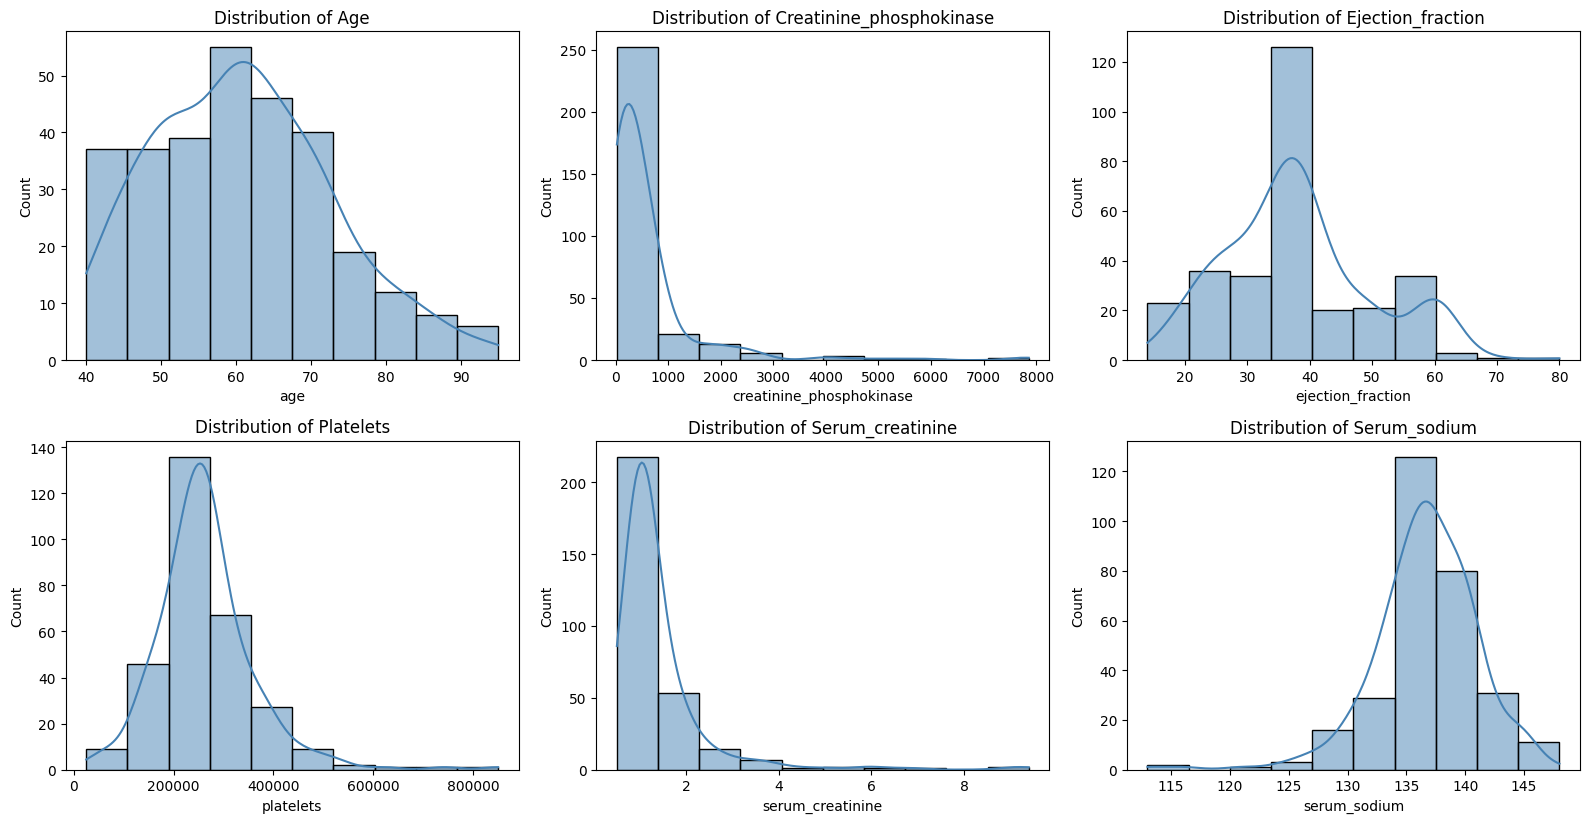

In [8]:
# Continuous features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Create the Distribution plot for each numerical variable in the data set
plt.figure(figsize=(16, 12))

# Loop through list of numerical features with index staring from 1
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, bins=10, color="steelblue")
    plt.title(f'Distribution of {feature.capitalize()}')
    
plt.tight_layout()
plt.show()

As per the plot, we can observe that the distribution of the Age is mostly between 40 to 70 which is right-skewed. Hence majority of the population is older adults. Similarly, the Creatinine Phosphokinase, Platelets, Serum Creatinine distribution is also right-skewed. The serum sodium distrubition is 135-140 which is a normal range, hence it seems fairly symmetric. The heart's pumping efficiency is gauged by the ejection fraction, and distribution can indicate that the dataset contains people with both reduced and normal heart function.

## Detection of outliers for Continuous features

The continuous variables in my dataset are age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, and time. Detect the potential outliers and remove them and create a new dataframe with no outliers.

1. Boxplot to check the presence of outliers
2. Check the outliers by z score method and remove the outliers from the data: The Z-score, alternatively referred to as a standard score, measures how far a given data point deviates from the mean in terms of standard deviations.

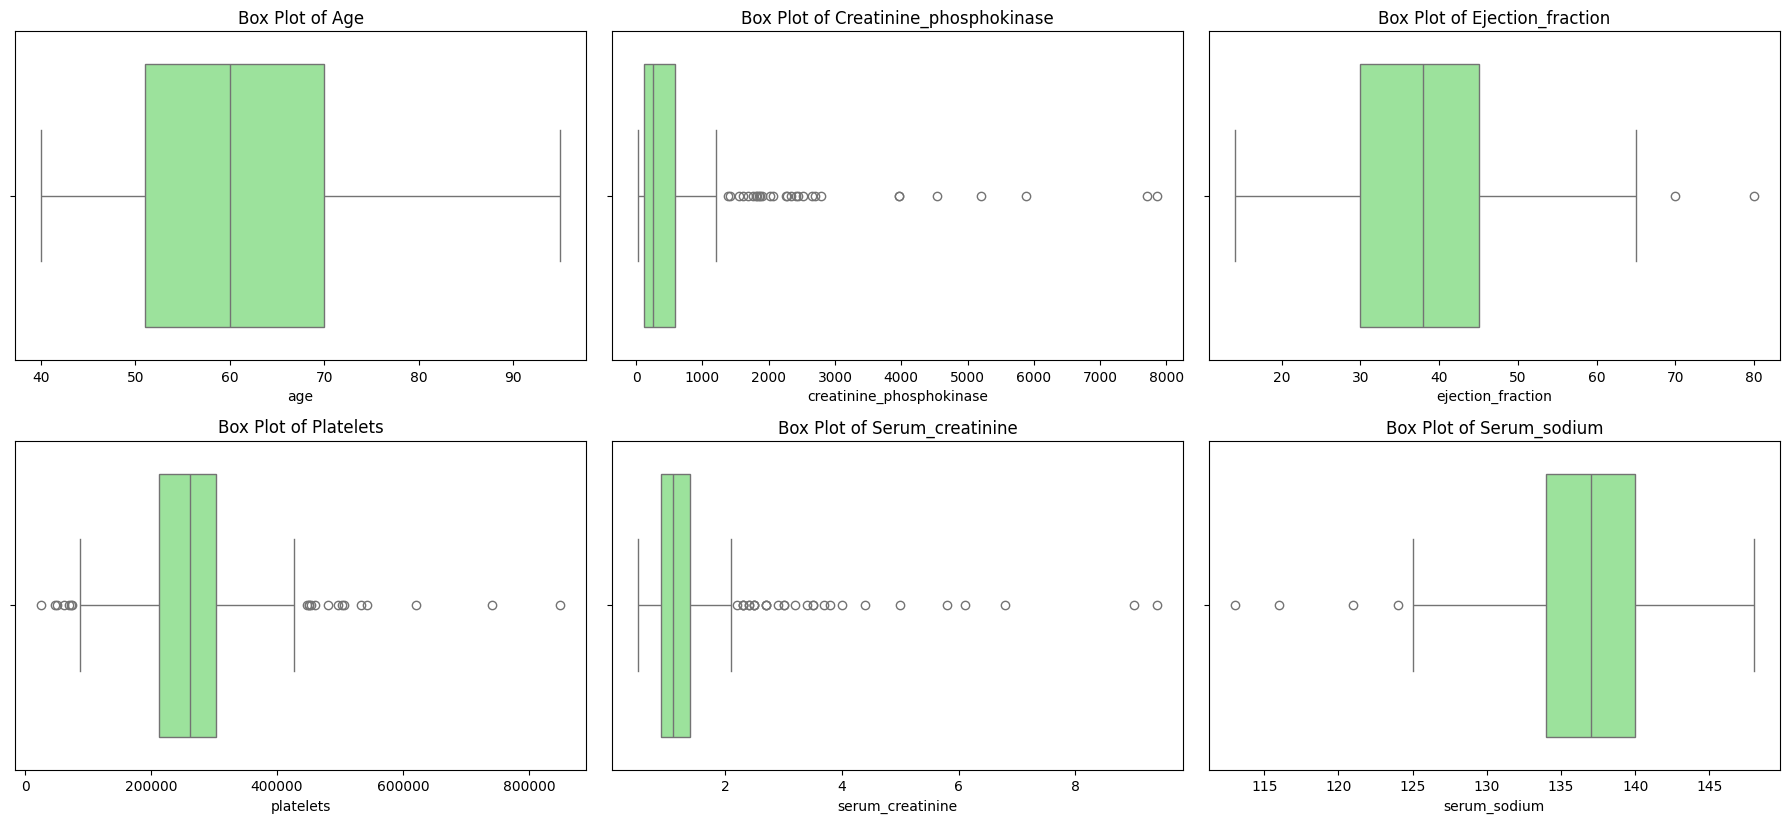

In [9]:
# Create box plots for each numerical variable to detect outliers in the dataset
plt.figure(figsize=(18, 12))

# Loop through the numerical feature's list created previously
for i, feature in enumerate(numerical_features, 1):

    # Create a subplot with three rows and three columns, then insert the existing plot into the ith position.
    plt.subplot(3, 3, i)

    # Create a boxplot for the current feature
    sns.boxplot(x=data[feature], color='lightgreen')

    # Set the title of the boxplot
    plt.title(f'Box Plot of {feature.capitalize()}')

plt.tight_layout()
plt.show()

From the plots above we can see that dataset with features creatinine_phosphokinase, platelets, serum_creatinine, serum_sodium has some points beyond the “whiskers” (lines extending from the boxes) which indicates the potential presence of outliers.

Hence we will remove the outliers present in our data by Z score method.

In [11]:
# Copy the data into new variable to retain the original data 
data_no_out = data.copy()

# Generate the function to detect outliers using Z-score method
def detect_outliers(x):
    z_scores = (x - x.mean()) / x.std()
    outliers = np.abs(z_scores) > 3
    return outliers

# Identify and remove outliers from the numerical features in the dataset
for feature in numerical_features:

    # call the function to detect outliers in the feature
    outliers = detect_outliers(data_no_out[feature])
    
    # Print the sum of the outliers present in each feature
    print(f"Number of outliers present in {feature} are: {outliers.sum()}")
    
    # Remove the outliers
    data_no_out = data_no_out[~outliers]

# Save the new dataframe without the outliers into a variable
new_data = data_no_out

Number of outliers present in age are: 0
Number of outliers present in creatinine_phosphokinase are: 7
Number of outliers present in ejection_fraction are: 1
Number of outliers present in platelets are: 3
Number of outliers present in serum_creatinine are: 6
Number of outliers present in serum_sodium are: 3


# Correlation and chi-squared analysis

In order to determine the direction and strength of associations among variables and to gain an understanding of their interdependence, correlation analysis is essential. Conversely, chi-squared analysis is useful for finding patterns in categorical data and for assessing the relationship between categorical variables and hypothesis testing.

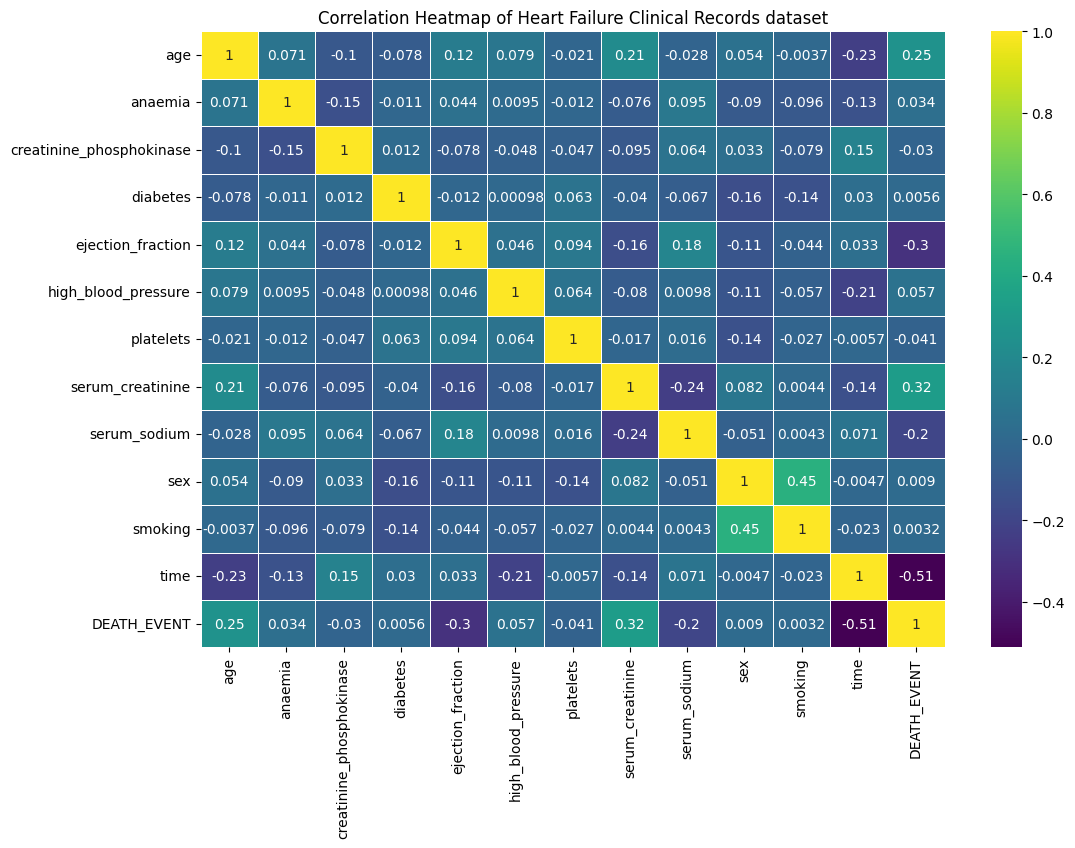

In [12]:
# Correlation heatmap to check the corelation of features
plt.figure(figsize=(12, 8))

# Calculate the corelation matrix for the data with no outliers
correlation = new_data.corr()

# Create the heatmap for the visualization
sns.heatmap(correlation, annot=True, cmap='viridis', linewidths=0.5) # 'annot=True' (adds the correlation coefficients on heatmap),  cmap='viridis (set the colormap), linewidths 9adds a border around each cell
plt.title('Correlation Heatmap of Heart Failure Clinical Records dataset')
plt.show()

## Chi square test for Categorical variables

In [13]:
# Conduct the chi-square test for each categorical feature in the dataset
for feature in categorical_features:

    # Create the contingency_table between target variable and each feature in the dataset by pd.crosstab()
    contingency_table = pd.crosstab(new_data[feature], new_data['DEATH_EVENT'])

    # Perform the Chi-squared test on the contingency table
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Chi-squared test: {feature}:")
    print(f"Chi2 Stats: {chi2}")
    print(f"P-value: {p}")
    print("\n")

Chi-squared test: anaemia:
Chi2 Stats: 0.18442621535107567
P-value: 0.6675966944019793


Chi-squared test: diabetes:
Chi2 Stats: 0.0
P-value: 1.0


Chi-squared test: high_blood_pressure:
Chi2 Stats: 0.6773052493300502
P-value: 0.41051619906381887


Chi-squared test: sex:
Chi2 Stats: 0.00020150063998882167
P-value: 0.9886743355229413


Chi-squared test: smoking:
Chi2 Stats: 0.0
P-value: 1.0


Chi-squared test: DEATH_EVENT:
Chi2 Stats: 274.29946965946976
P-value: 1.3118538006844187e-61




Based on the result of the correlation matrix heatmap of the dataset, it is eveident that the majority of features showed minimal to no strong correlation. Notably, there is a discernible correlation between ‘sex’ and ‘smoking,’ indicating a potential association between gender and smoking behavior. Additionally, the death event and time are negatively corelated as per the matrix. It is important to note that no strong correlations were found among the other features, emphasizing the need to explore additional aspects of feature relationships.

Chi-squared tests evaluate how independent two categorical variables are of one another. If pvalue is greater than the significance level (commonly 0.05). Therefore, we fail to reject the null hypothesis, suggesting no significant association between two categorical variables. Anaemia, high blood pressure, sex, smoking do not significantly correlate with death events in the dataset, according to Chi-squared tests.

# Normalize the data using log transformation

The given code applies log transformation to non-normally distributed continuous features, standardizes the transformed features, adds the standardized features to the original data frame, and checks the normality of the transformed and standardized features.

In [14]:
# Make a copy of dataframe to retain the original data with no outliers
trans_data = new_data.copy()

# Apply log transformation onto numerical features
for feature in numerical_features:
    
    # Addition of a small constant to avoid log(0) or negative values
    const = 1e-10
    transformed = np.log(trans_data[feature] + const)
    
    # Assign the transformed values to a new column in the dataframe e.g. 'age_log'
    trans_data[f"{feature}_log"] = transformed


In [16]:
# Create a list of log_transformed features in the dataset
log_transformed_features = [f"{feature}_log" for feature in numerical_features]

# Create a function to check normality using the Shapiro-Wilk test
def check_normality(series):
    # Perform the shipiro wilk test to check the normality
    stat, p_value = shapiro(series)
    return p_value

# Check the normality of the transformed features in the dataset
for feature in log_transformed_features:

    # Apply check normality function to get the p value
    p_value = check_normality(trans_data[feature])

    # Print the result to check if the data is normally distributed or not after applying log transformation
    is_normal = "Normally Distributed" if p_value > 0.05 else "not Normally Distributed"
    print(f"The Column {feature}: is {is_normal} (P value: {p_value:.5f})")

# Save the new dataframe to a variable
final_transformed_data = trans_data

The Column age_log: is not Normally Distributed (P value: 0.00665)
The Column creatinine_phosphokinase_log: is not Normally Distributed (P value: 0.00000)
The Column ejection_fraction_log: is not Normally Distributed (P value: 0.00000)
The Column platelets_log: is not Normally Distributed (P value: 0.00000)
The Column serum_creatinine_log: is not Normally Distributed (P value: 0.00000)
The Column serum_sodium_log: is not Normally Distributed (P value: 0.00070)


# Selection of model and compatibility
The given dataset is well-structured for predictive modeling, with a mix of numerical and categorical features. The target variable, death_event, is binary, indicating whether a patient experienced an event death or not. We haved selected Knn model which compatible in handling mix of numerical and binary categorical features. We need to ensure that numerical features are appropriately scaled to avoid bias.The next model is Naive Bayes which assumes feature independence given the class and it can handle handle mixed types of features if we select the mixed type of features for the model. The third model Random Forest is well-suited for the dataset. It can handle a mix of numerical and categorical features, is robust to outliers, and provides insights into feature importance

# Feature selection

A crucial stage in the creation of machine learning models is feature selection. As it is important to improves Model Performance by reducing overfitting, enhances generalization, and boosts computational efficiency.It also enhances Model interpretability, addresses dimensionality issues and facilitates Model deployment by simplifying the deployment.

Below we have done training of data using random forest with a binary outcome variable (death_event) using the randomForest package. Here the variable importance scores are calculated, and a bar plot demonstrating the significance of each feature in predicting the ‘death_event’ is produced.

In [17]:
# Drop the 'time' column from the dataset 
heart_data = data_no_out.drop(columns=['time'])

# Perform the Splitting of the dataset into features and target variable
# Drop the target column from the data
X = heart_data.drop('DEATH_EVENT', axis=1)  

# Extract the target variable
y = heart_data['DEATH_EVENT']  

# Split the data into training and testing datasets sets (70% training and 30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random_state=42 ensures reproducibility of the random split

# Initialize the Random Forest Classifier, set the number of trees to 100.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = model.feature_importances_

# Create a DataFrame to display better readability
importance_df = pd.DataFrame({
    'Features': X.columns,
    'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print the created DataFrame
print(importance_df)

                    Features  Importance
4          ejection_fraction    0.233787
7           serum_creatinine    0.221301
0                        age    0.125071
8               serum_sodium    0.112413
2   creatinine_phosphokinase    0.111226
6                  platelets    0.107980
1                    anaemia    0.019772
5        high_blood_pressure    0.019723
3                   diabetes    0.018633
9                        sex    0.016628
10                   smoking    0.013466


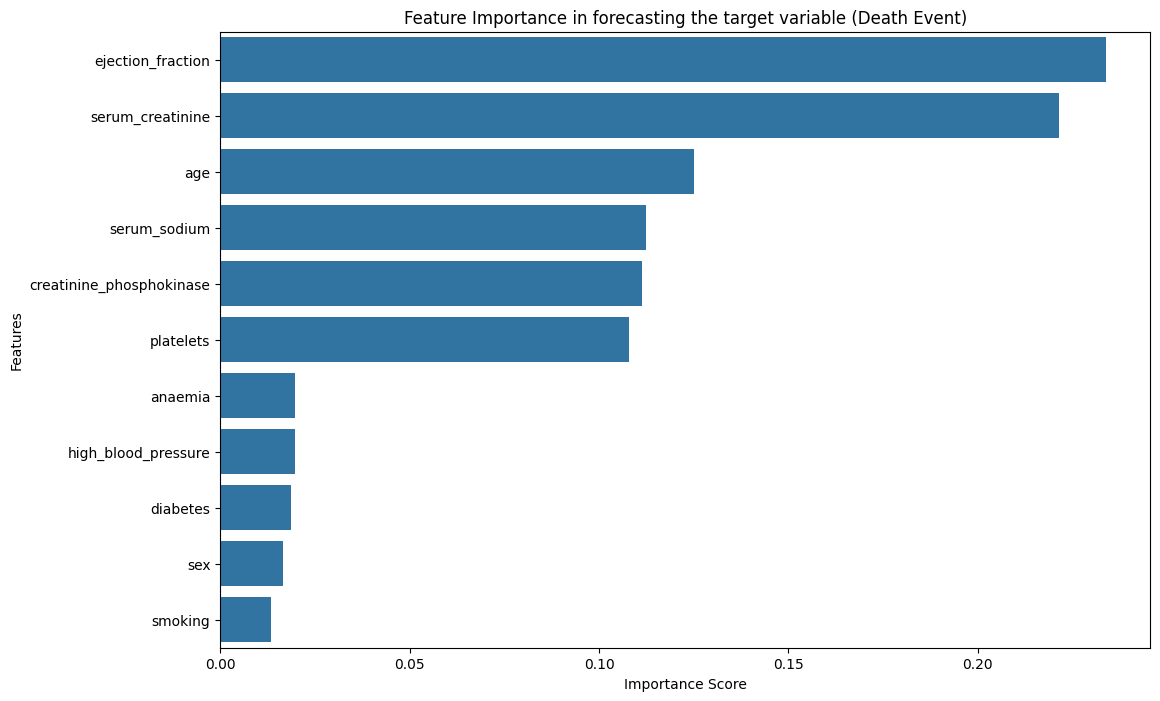

In [18]:
# Plot the feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Features', data=importance_df)
plt.title('Feature Importance in forecasting the target variable (Death Event)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Based on the feature ranking further we will go ahead with serum_creatinine,ejection_fraction, age, platelets, creatinine_phosphokinase, serum_sodium.

# Split the dataset into training and testing

The below code splits a dataset to train and test data for machine learning model, focusing on classifying data according to the “DEATH_EVENT” variable. It selects the features which we want to take into consideration for models and divides the data into training and testing sets, and prepares it for the subsequent steps of model training and evaluation. The holdout method is a fundamental technique in machine learning for evaluating model performance, preventing overfitting, tuning hyperparameters, and gaining insights into the generalization capabilities of a model

In [19]:
# Set the seed for reproducibility
np.random.seed(12345)

# Selected features based on feature ranking by rf model
features = ["serum_creatinine", "ejection_fraction", "age", "platelets", "creatinine_phosphokinase", "serum_sodium"]

# Seggragate the predicting features and target label
# extract selected features only from the dataframe
selected_features = new_data[features]

# extract target variable
target = new_data['DEATH_EVENT']

# Scale the features by StandardScaler to ensure that all features have a mean of 0 and a std dev of 1
scale = StandardScaler()
scaled_selected_features = scale.fit_transform(selected_features)


# Perform the splitting of the data into training (80%) and testing (20%) data sets
train_data, test_data, train_target, test_target = train_test_split(
    scaled_selected_features, target, test_size=0.2, stratify=target, random_state=1234)

# KNN Model

Evaluate the performance of the KNN model by using metrics accuracy, precision, recall, and F1 score.

In [20]:
# Set the range of `n_neighbors` to test the array of integers
range = {'n_neighbors': np.arange(1, 10)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Use GridSearchCV to get the best `n_neighbors` from the grid search by using 10-fold cross-validation (cv=10)
grid_search = GridSearchCV(knn, range, cv=10, scoring='accuracy')

# Fit this grid search into train dataset to train the model
grid_search.fit(train_data, train_target)

# extract the best n_neighbors from grid search results and print the same
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Optimal K for KNN model is: {best_n_neighbors}")

# Train the KNN model with the best `n_neighbors`
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_best.fit(train_data, train_target)

# Predict the target for test data
result = knn_best.predict(test_data)

# Evaluate the model by metrics
accuracy = accuracy_score(test_target, result) # comparison of the predicted labels to the true labels
conf_matrix = confusion_matrix(test_target, result) # Generate confusion matrix
class_report = classification_report(test_target, result, zero_division=1) # Create the classification report to evaluate precision, recall, F1-score

# Print evaluation results
print(f"Model Accuracy for KNN: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Optimal K for KNN model is: 7
Model Accuracy for KNN: 0.77
Confusion Matrix:
 [[34  5]
 [ 8  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.64      0.53      0.58        17

    accuracy                           0.77        56
   macro avg       0.73      0.70      0.71        56
weighted avg       0.76      0.77      0.76        56



The accuracy of the KNN model is 0.77 which implies that model correctly predicted the class for 77% of the instances in the given dataframe. Confusion matrix further provides detailed explination of the model accuracy:

True Positives (TP): 34 instances were correctly predicted as survived.

False Negatives (FN): 5 instances were incorrectly predicted as having status 0 (no death) when they actually had status 1 (death).

False Positives (FP): 8 instances were incorrectly predicted as having status 1 (death) when they actually had status 0 (no death).

True Negatives (TN): 9 instances were correctly predicted as having status 0 (no death).

The overall accuracy of the model is 77%, indicating that roughly 77% of all predictions made by the model were correct. Precision gauges how well the model predicts the positive outcomes. Here, it’s 76%, indicating that when the model predicts an observation as positive it’s correct about 76% of the time. The fraction of real positives that the model correctly identified is measured by recall. Here it is 77%. The harmonic mean of recall and precision is the F1 score. It combines recall and precision into one metric. The F1 score in this instance is 76%, suggesting that recall and precision are well-balanced.

These metrics indicate that the KNN model performs quite well. Its comparatively high accuracy and well-balanced recall and precision indicate that it can successfully identify positive cases with a low false positive rate.

# Naive Bayes Model

Naive Bayes is a probabilistic classification algorithm based on Bayes’ theorem. The given code trains the Naive Bayes model on a dataset and predicts the outcomes on a separate test dataset. It also assess the model’s effectiveness through the analysis of a confusion matrix and performance metrics.

In [21]:
# Train the Naive Bayes Model
model = GaussianNB()
model.fit(train_data, train_target)

# Predict the target for test data
test_prediction = model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_target, test_prediction)
conf_matrix = confusion_matrix(test_target, test_prediction)
class_report = classification_report(test_target, test_prediction, zero_division=1)

# Print evaluation results
print(f"Model Accuracy for NB Model: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model Accuracy for NB Model: 0.77
Confusion Matrix:
 [[34  5]
 [ 8  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.64      0.53      0.58        17

    accuracy                           0.77        56
   macro avg       0.73      0.70      0.71        56
weighted avg       0.76      0.77      0.76        56



True Positives (TP): 34 instances were correctly predicted as survived.

False Negatives (FN): 5 instances were incorrectly predicted as having status 0 (survived) when they actually had status 1 (death).

False Positives (FP): 8 instances were incorrectly predicted as having status 1 (death) when they actually had status 0 (no death).

True Negatives (TN): 9 instances were correctly predicted as having status 0 (no death).

Based on the above matrics, Accuracy reflects overall correct predictions, with 77% accuracy. Precision precentage indicates that 76% of positive predictions are accurate. Recall metric 0.77 implies that model successfully identified 77% of actual positives. And high F1 score 76.99% here indicates that there is balance between precision and recall.

# Random Forest
Similary, we will train the Random forest model on the training dataset and use testing dataset to make the prediction of death events. As before, we will evaluate the performance of the model using metrics of recall, f1 score, accuracy and precision scores

In [22]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=12345) # Initialize the Rf classifier  with 1000 trees
model.fit(train_data, train_target)

# Predict the target for test data
prediction = model.predict(test_data)

# Evaluate the model by calculating the metrics
accuracy = accuracy_score(test_target, prediction) # Calculate the accuracy
conf_matrix = confusion_matrix(test_target, prediction) # Generate confusion matrix
class_report = classification_report(test_target, prediction, zero_division=1) # generate classification report

# Print evaluation results
print(f"Model Accuracy for RF model: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Model Accuracy for RF model: 0.79
Confusion Matrix:
 [[33  6]
 [ 6 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.65      0.65      0.65        17

    accuracy                           0.79        56
   macro avg       0.75      0.75      0.75        56
weighted avg       0.79      0.79      0.79        56



True Positives (TP): 33 instances were correctly predicted as survived.

False Negatives (FN): 6 instances were incorrectly predicted as having status 0 (survived) when they actually had status 1 (death).

False Positives (FP): 6 instances were incorrectly predicted as having status 1 (death) when they actually had status 0 (no death).

True Negatives (TN): 11 instances were correctly predicted as having status 0 (no death).

The accuracy of the Random forest model was 79% indicates the overall correctness of the model’s predictions which means 79% values are correctly predicted. The precision percentage 79% implies that this much percent of instances predicted as positive are indeed positive. Also, by recall metric we can say that approximately 79% of the actual positive instances are correctly predicted by the model. And high F1 score of 79% suggests a good balance between precision and recall in the model’s performance.

The kNN, Random Forest, and Naive Bayes models demonstrate relatively good performance in terms of accuracy, precision, and F1 score, with kNN and Naive Bayes achieving similar accuracy (77%) and Random Forest showing higher precision (79%). The Random Forest model exhibits better performance as compare to other models. Future work should focus on addressing issues with data balance, ensemble model construction, and potential biases in the dataset to unlock the full predictive potential of the models.